In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix #confussion matrix es una manera de representar cuan bien esta representando el modelo para problemas de clasificaion
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

Librerias comunes en deep learning:

capa de abstraccion menor:

- TensorFlow: todo medio magico, lo empuja google
- Pytorch: da mayor flexibilidad que tensorflow, lo empuja facebook/meta
- Jax: no es solo para NNs, es mas general, como si fuese un compilador para python

capa de abstraccion mayor:

- Keras: equivalente a tensorflow
- Lightning: equivalente a pytorch
- Keras core

In [2]:
(images, labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


- Se utiliza load_data() del conjunto de datos MNIST, que es un conjunto de datos muy popular utilizado para entrnear modelos de reconomiento de digitos escritos a mano

- La funcion mnist.load_data() carga los datos de entrenamiento y prueba.

images y lables contienen las imagenes y las etiquetas correspondientes del conjunto de entrenamiento.

test_images y test_labes continen las imagenes y las etiquetas correspondientes del conjunto de prueba.


In [3]:
images.shape

(60000, 28, 28)

- Se obtiene la forma de images, que nos dice cuantas imagenes hay y sus dimensiones.

- Salida: hay 60.000 imagenes en el conjunto de entrenamiento, y cada imagen tiene una dimension de 28x28 pixeles.

In [6]:
labels.shape

(60000,)

- Aca se obtiene la forma de labels, que nos dice cuantas etiquetas hay.

- Salida (60000,), lo que significa que hay 60.000 etiquetas en el conjunto de entrenamiento, cada una correspondiente a una imagen.

In [7]:
labels.min(), labels.max()

(0, 9)

- Esta linea obtiene el valor minimo y maximo de las etiquetas

- Salida (0, 9), lo que indica que las etiquetas es en elr ango de 0 a 9, represnetando los digitos del 0 al 9.

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


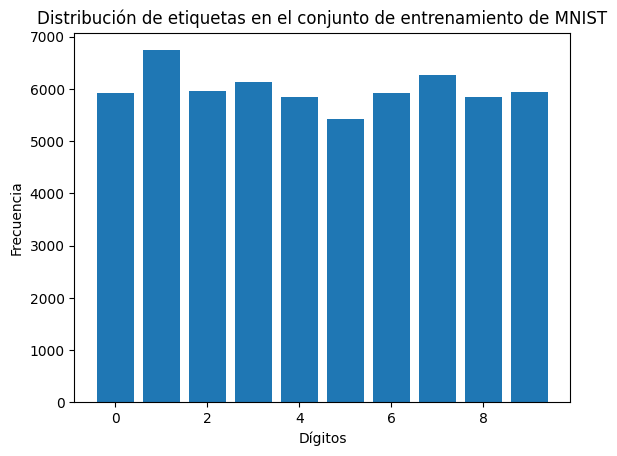

In [8]:
# Contar la frecuencia de cada etiqueta en el conjunto de entrenamiento
unique, counts = np.unique(labels, return_counts=True)

# Mostrar las frecuencias
print(dict(zip(unique, counts)))

# Graficar la distribución de etiquetas
plt.bar(unique, counts)
plt.xlabel('Dígitos')
plt.ylabel('Frecuencia')
plt.title('Distribución de etiquetas en el conjunto de entrenamiento de MNIST')
plt.show()

*RED NEURONAL*

In [10]:
from tensorflow.keras.layers import Input, Dense, Flatten #input, dense y flatten son las capas de la red. #input es la capa de entrada. #dense son las capas intermedias en keras, en pytorrch se llaman linear, #flatten convierte una matriz en un vector. Este tipo de modelos no tienen conceptos de localidad, entonces vamos a querer convertirselo en vez de en una matriz de 28 x 28, lo vamos a querer convertir en un vector de 786 entradas, asi lo va a ver la red.
from tensorflow.keras.optimizers import Adam #Adam es el algoritmo que vamos a usar para entrenar la red, es la que va a ser el fit para ajustar los parametors y que el modelo ande bien, utiliza backpropagation y gradient descent.
from tensorflow.keras.models import Model #Model es lo que se usa como para pegar todo

In [11]:
inp = Input((28,28)) # ya sabe que la primer capa recibira una matriz de 28x28 para cada neurona
flattened = Flatten()(inp) #componemos las funciones, convertimos la matriz en vector
dense1 = Dense(96, activation='relu')(flattened) #capa densa1 con funcion de activacion relu con 96 neuronas
dense2 = Dense(48, activation='relu')(dense1) #capa densa2 con funcion de activacion relu con 48 neuronas
final = Dense(10, activation='softmax')(dense2)#capa final con funcion de activacion softmax

#recordar que las funciones de activacion tienen que ser diferenciables y no linleas



model = Model(inputs=inp, outputs=final)# se compila el modelo a un lenguaje que la cpu o la gpu entiendan para correrlo, sobre la variable model queda el modelo compilado
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │        75,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,506 (314.48 KB)

 Trainable params: 80,506 (314.48 KB)

 Non-trainable params: 0 (0.00 B)

- inp = input((28, 28)) se define la entrada de la red neuronal. La entrada es una matriz de 28x28, que corresponde a las dimensiones de las imagenes en el conjunto de datos MNIST.

- flattened = Flatten()(inp) aca se utiliza la capa Flatten para convertir la matriz 2D de 28x28 en un vector de 784 elementos (28 * 28). Esta transformacion es necesaria para poder pasar los datos a las capas densas.

- dense1 = Dense(96, activation='relu')(flattened) primera capa densa. Se define una capa densa (fully connected) con 96 neuronals y la funcion de activacion ReLU. Esta capa toma el vector aplanado como entrada.

- dense2 = Dense(48, activation='relu')(dense1) se define otra capa densa con 48 neuronas y la funcion de activacion ReLU. Esta capa toma la salida de la capa dense1 como entrada.

- final = Dense(10, activation='softmax')(dense2) La capa final es otra capa densa con 10 neuronas y la funcion de activacion softmax. El numero 10 corresponde a las 10 clases de digitos (0-9) en el conjunto de datos MNIST. La funcion softmax se utiliza para la clasificacion multiclase, ya que convierte las salidas en probabilidades que suman 1.

- model = Model(inputs=inpt, outputs=final) se crea un modelo de la API funcional de Keras, especificando la entrada y la salida del modelo. En este caso, el modelo tomara como entrada una imagen de 28x28 y producira como salida una probabilidad para cada una de las 10 clases.

- model.summary() esta linea imprime un resumen del modelo, que incluye informacion sobre cada capa, la forma de su salida, y la cantidad de parametros etrenables.

Output:

- InputLayer: La entrada es una matriz de 28x28

- Flatten: La salida es un vector de 784 elementos.

- Dense (primera capa densa): La salida tiene 96 neuronas y el numero de parametros es 75.360 (784 * 96 + 96)

- Dense1 (segunda capa densa): La salida tiene 48 neuronas y el numero de parametros es 4.656 (96 * 48 + 96)

- Dense2 (capa de salida): La salida tiene 10 neuronas y el numero de parametros es 490 (48 * 10 + 10)

En total, el modelo tiene 80.506 parametors entreanables.

los parametros son los pesos entre neuronas. 75,360 viene de 784 * 96

In [12]:

X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.1, random_state=42) #en deep learning no se suele usar 80-20

print(type(X_train))

<class 'numpy.ndarray'>


In [13]:
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #el optimizador es adam, 0.001 es el factor de aprendizaje, suele andar bien ese numero. en la loss hay que decirle que loss queremos que usea para aprender, si tenemos clasificacion usualmente se usa esta, sino MSE para regresion

Optimizador Adam:

- Adam combina las ventajas de dos otros modelos de optimizacion: Adaptive Gradient Algorithm (AdaGrad) y Root Mean Square Propagation (RMSProp)

- Ventajas: Ajusta las tasas de aprendizaje individuales para cada paraemtro y mantiene un promedio movil de los gradientes y sus cuadrados, lo que puede acelerar el entrenamiento y mejorar la convergencia.

Funcion de perdida:

- Categorical Crossentropy es comunmente utilizada en problemas de clasificacion porque mide la "distancia" entre las distribuciones de probabilidad de las predicciones y las etiquetas verdaderas.

- Sparse Categorical Crossentropy es util cuando las etiquetas estan codificadas como enteros (en lugar de vecotres one-hot), haciendo que sea mas eficiente en terminos de memoria.

Ejemplo del flujo de entrenamiento:

1- Compilacion:

- El modelo se compila con los paremtros especificados: optimizador, funcion de perdida y metricas.

- La complicacion traduce el modleo a un formato que puede ser ejecutado eficientemente por la CPU o GPU.

2- Entrenamiento:

- Despues de compilar el modelo, normalmente se llamaria al metodo model.fit para entrenar el modelo con los datos de entrenamiento y validacion.


In [14]:
hst = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid)) #los datos de validacion son opcionales.

Epoch 1/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7862 - loss: 4.7632 - val_accuracy: 0.9120 - val_loss: 0.4290
Epoch 2/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9110 - loss: 0.3872 - val_accuracy: 0.9262 - val_loss: 0.3470
Epoch 3/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9327 - loss: 0.2708 - val_accuracy: 0.9297 - val_loss: 0.3228
Epoch 4/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9423 - loss: 0.2259 - val_accuracy: 0.9360 - val_loss: 0.2863
Epoch 5/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9495 - loss: 0.1914 - val_accuracy: 0.9285 - val_loss: 0.3651
Epoch 6/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9543 - loss: 0.1728 - val_accuracy: 0.9353 - val_loss: 0.2733
Epoch 7/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9597 - loss: 0.1482 - val_accuracy: 0.9453 - val_loss: 0.2279
Epoch 8/60
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9643 - loss: 0.1267 - 

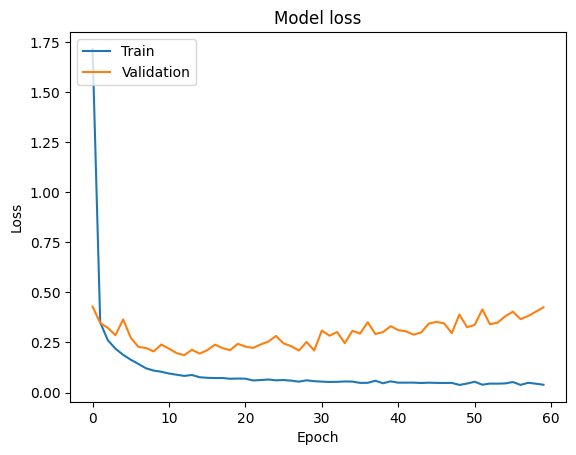

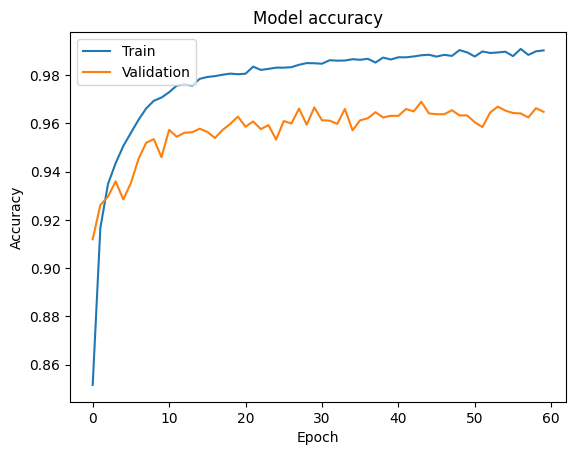

In [11]:
plt.plot(hst.history['loss'])
plt.plot(hst.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hst.history['accuracy'])
plt.plot(hst.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Descripcion de los graficos:

Perdida (Loss):

- El grafico de perdida muestra como cambia la perdida del modelo durante el entrenamiento y la validacion a lo largo de las epocas.

- Idealmente la perdida de entrenamiento y validacion deberia disminuir con el tiempo si el modelo esta aprendiendo correctamente.

Precision (Accuracy):

- El grafico de precision muestra como cambia la precision del modelo durante el entrenamiento y la validacion a lo largo de las epocas.

- La precision deberia aumentar con el tiempo si el modelo esta aprendiendo correctamente.

Proposito:

Estos graficos son herramientas visuales importantes para evaluar el rendimiento del modelo durante el entrenamiento. Permiten identificar probleams como el sobreajuste (overfitting), donde la precision de entrenamiento es alta pero la precision de validacion es baja, o el sobreajuste (underfitting), donde ambos valores de precision son bajos.
